In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from io import StringIO

In [ ]:
s = """
         0     1654480  2.4750354243e-01  2.4737389186e-01               nan
         1      887952  1.3283404182e-01  3.4960079200e-01               nan
         2      518456  7.7558928845e-02  2.4291642569e-01               nan
         3      315321  4.7170751235e-02  1.1061849424e-01               nan
         4      198894  2.9753741096e-02  3.7127496944e-02               nan
         5      138321  2.0692264332e-02  9.7946923404e-03               nan
         6      112245  1.6791399787e-02  2.1147158225e-03               nan
         7      101856  1.5237247243e-02  3.8425923321e-04               nan
         8       97414  1.4572741939e-02  5.9972908493e-05               nan
         9       94952  1.4204436657e-02  8.1612340075e-06               nan
        10       92441  1.3828801174e-02  9.8127739220e-07               nan
        11       90773  1.3579275094e-02  1.0551563092e-07               nan
        12       87945  1.3156217687e-02  9.5929970750e-09               nan
        13       84931  1.2705335430e-02  1.3353158452e-09               nan
        14       82284  1.2309354894e-02  0.0000000000e+00               nan
        15       79037  1.1823616776e-02  0.0000000000e+00               nan
        16       75704  1.1325013404e-02  0.0000000000e+00               nan
        17     1971666  2.9495329015e-01  0.0000000000e+00               nan
"""

In [ ]:
df = pd.read_csv(StringIO(s), sep=r"\s\s+", header=None, names=["bin", "n", "n/runs", "_", "_2", "_3"])

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


In [ ]:
sigma = 36/91
#sigma = -1
tau = 187/91

In [ ]:
df["s_sigma"] = (2.0 ** (df["bin"] * sigma))
df["cumulative_nruns"] = df["n/runs"][::-1].cumsum()[::-1]
df["s_tau_p"] = df["cumulative_nruns"] * ((2.0 ** df["bin"]) ** (tau - 2))

In [ ]:
df.head()

,bin,n,n/runs,_,_2,_3,s_sigma,cumulative_nruns,s_tau_p
0,0,1654480,0.247504,0.247374,NaN,NaN,1.000000,1.000000,1.000000
1,1,887952,0.132834,0.349601,NaN,NaN,1.315494,0.752496,0.781708
2,2,518456,0.077559,0.242916,NaN,NaN,1.730524,0.619662,0.668706
3,3,315321,0.047171,0.110618,NaN,NaN,2.276493,0.542103,0.607719
4,4,198894,0.029754,0.037127,NaN,NaN,2.994713,0.494933,0.576377


Text(0, 0.5, '$s^{\\tau - 2} P_{\\geq s}$')

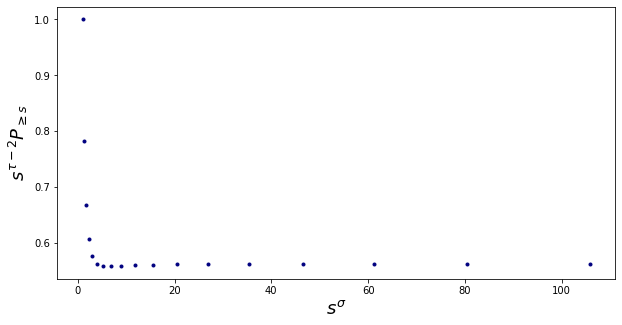

In [ ]:
plt.figure(figsize=(10,5))
plt.scatter(df["s_sigma"], df["s_tau_p"], color='navy', marker='.')
plt.xlabel(r"$s^{\sigma}$", fontsize=18)
plt.ylabel(r"$s^{\tau - 2} P_{\geq s}$", fontsize=18)

In [ ]:
el = 5 #number of points to remove
regs = 4 #last BLANK points ot include in linear regression
from statsmodels.regression.linear_model import OLS

In [ ]:
mod = OLS.from_formula("s_tau_p~s_sigma", data=df[-regs:]).fit()

In [ ]:
mod.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/stats/stattools.py:71: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  "samples were given." % int(n), ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                s_tau_p   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.968
Method:                 Least Squares   F-statistic:                     92.09
Date:                Thu, 07 Apr 2022   Prob (F-statistic):             0.0107
Time:                        21:07:59   Log-Likelihood:                 37.057
No. Observations:                   4   AIC:                            -70.11
Df Residuals:                       2   BIC:                            -71.34
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5628    5.6e-05      1e+04      0.000       0.563       0.563
s_sigma     7.002e-06    7.3e-07      9.596      0.011    3.86e-06    1.01e-05
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.061
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.515
Skew:                          -0.226   Prob(JB):                        0.773
Kurtosis:                       1.302   Cond. No.                         265.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
np.sum(mod.resid)

-6.661338147750939e-16

In [ ]:
x_inter = np.arange(df['s_sigma'].min(), df['s_sigma'].max(), 0.5)
y_inter = mod.params.s_sigma * x_inter + mod.params.Intercept

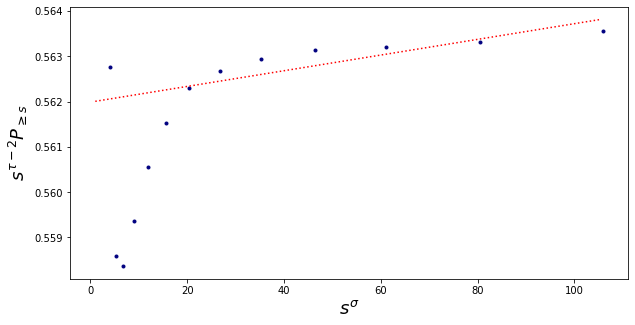

In [ ]:
plt.figure(figsize=(10,5))
plt.scatter(df["s_sigma"][el:], df["s_tau_p"][el:], color='navy', marker='.')
plt.plot(x_inter, y_inter, linestyle='dotted', color='red')
plt.xlabel(r"$s^{\sigma}$", fontsize=18)
plt.ylabel(r"$s^{\tau - 2} P_{\geq s}$", fontsize=18)
plt.savefig("output.eps")